In [1]:
!pip install psycopg2-binary

In [3]:
import psycopg2
# Replace with your actual PostgreSQL credentials
conn = psycopg2.connect(
dbname='Project',
user='postgres',
password='0302', # Change this!
host='localhost',
port='5432'
)
cur = conn.cursor()
print("✅ Connected to the database!")

✅ Connected to the database!


In [16]:
import psycopg2
# Replace with your actual PostgreSQL credentials
conn = psycopg2.connect(
dbname='Project',
user='postgres',
password='0302', # Change this!
host='localhost',
port='5432'
)
cur = conn.cursor()
print("✅ Connected to the database!")

✅ Connected to the database!


In [18]:
cur.execute("SELECT * FROM books_data LIMIT 5;")  # limitamos para no imprimir toda la tabla
rows = cur.fetchall()

for row in rows:
    print(row)

('Its Only Art If Its Well Hung!', 'Julie Strain', None, datetime.date(1905, 6, 18), 'Comics & Graphic Novels', None)
('Dr. Seuss: American Icon', 'Philip Nel', 'A&C Black', datetime.date(2005, 1, 1), 'Biography & Autobiography', None)
('Wonderful Worship in Smaller Churches', 'David R. Ray', None, datetime.date(1905, 6, 22), 'Religion', None)
('Whispers of the Wicked Saints', 'Veronica Haddon', 'iUniverse', datetime.date(2025, 2, 5), 'Fiction', None)
('Nation Dance: Religion, Identity and Cultural Difference in the Caribbean', 'Edward Long', None, datetime.date(2003, 3, 1), None, None)


In [20]:
cur.close()
conn.close()
print("✅ Connection closed.")

✅ Connection closed.


In [22]:
try:
    cur.execute("SELECT * FROM books_data LIMIT 5;")
    rows = cur.fetchall()
    for row in rows:
        print(row)
except Exception as e:
    print("Algo salió mal al consultar la base de datos:", e)

Algo salió mal al consultar la base de datos: cursor already closed


In [26]:
import psycopg2

conn = psycopg2.connect(
    dbname='Project',
    user='postgres',
    password='0302',
    host='localhost',
    port='5432'
)

In [39]:
import pandas as pd
query = """
    SELECT categories, SUM ("ratingsCount") AS total_ratings
    FROM books_data
    WHERE "ratingsCount" IS NOT NULL
    GROUP BY categories
    ORDER BY total_ratings DESC
    LIMIT 10;
"""
df = pd.read_sql (query, conn)
df

/var/folders/3w/7wh2_1l57rbc78s7f9lcj84h0000gn/T/ipykernel_31135/3232759851.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql (query, conn)


,categories,total_ratings
0,Fiction,413546
1,Juvenile Fiction,102203
2,Biography & Autobiography,95044
3,Religion,33641
4,History,32459
5,Travel,28688
6,Young Adult Fiction,28528
7,None,27046
8,Business & Economics,25540
9,Philosophy,22304


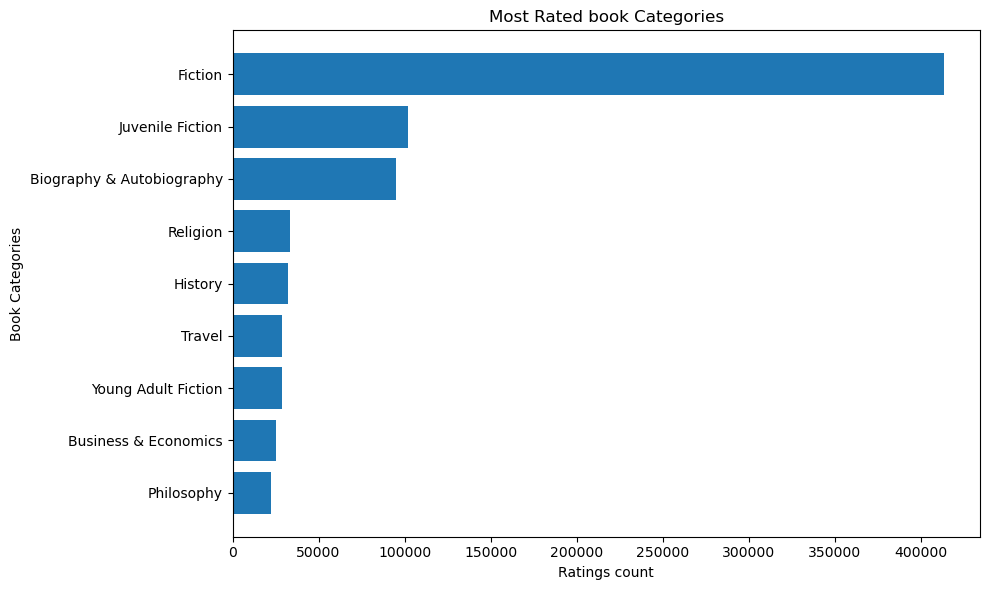

In [67]:
import matplotlib.pyplot as plt
df = df[df['categories'].notnull()]
plt.figure(figsize= (10, 6))
plt.barh(df['categories'], df['total_ratings'])
#adding tags
plt.xlabel ("Ratings count")
plt.ylabel("Book Categories")
plt.title("Most Rated book Categories")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [87]:
query = """
    SELECT title, "ratingsCount"
    FROM books_data
    WHERE "ratingsCount" IS NOT NULL
    ORDER BY "ratingsCount" DESC
    LIMIT 10;
    """
df = pd.read_sql(query, conn)
df

/var/folders/3w/7wh2_1l57rbc78s7f9lcj84h0000gn/T/ipykernel_31135/1707933821.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,title,ratingsCount
0,The Alchemist,4895
1,Unbroken,4572
2,A Mission to Millions; The Story of Ernie Alle...,4572
3,Blue Like Jazz: Nonreligious Thoughts on Chris...,4562
4,Eclipse,4392
5,Redeeming Love,4249
6,A Walk in the Woods,4234
7,The Tipping Point: How Little Things Can Make ...,4218
8,"Travel Light, Eat Heavy Along the Appalachian ...",4161
9,Henrietta,4067


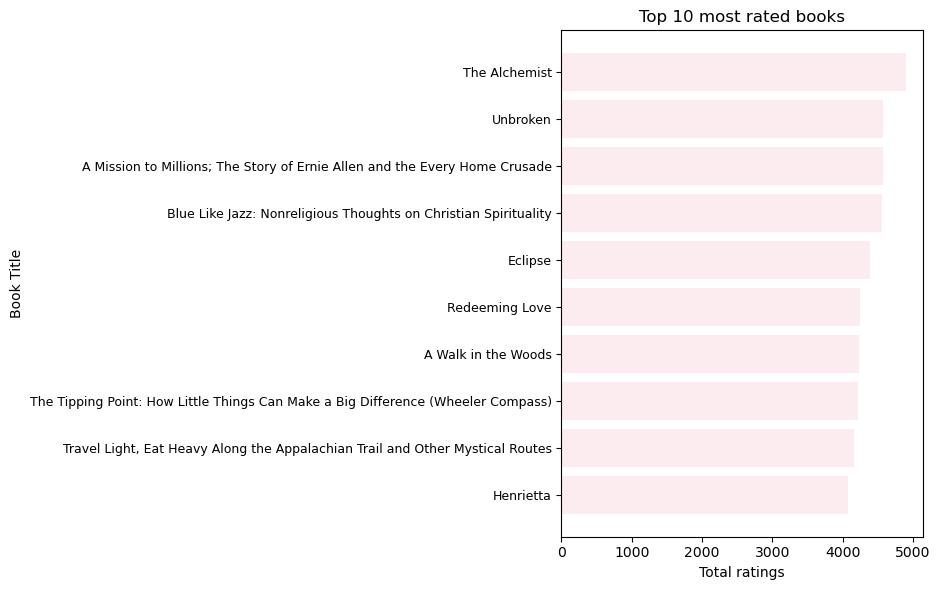

In [97]:
plt.figure(figsize= (10, 6))
plt.barh(df['title'], df['ratingsCount'], color = 'crimson', alpha=0.08)
#adding tags
plt.xlabel ("Total ratings")
plt.ylabel("Book Title")
plt.title("Top 10 most rated books")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.yticks (fontsize=9)
plt.show()


In [103]:
query = """
    SELECT publisher, AVG("ratingsCount") AS avg_ratings
    FROM books_data
    WHERE "ratingsCount" IS NOT NULL
    GROUP BY publisher
    ORDER BY avg_ratings DESC
    LIMIT 10;
    """
df = pd.read_sql(query, conn)
df

/var/folders/3w/7wh2_1l57rbc78s7f9lcj84h0000gn/T/ipykernel_31135/4219938344.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,publisher,avg_ratings
0,Abacus Software,3432.0
1,Techpr Incorporated,3387.0
2,lresda kames,3372.0
3,Kingkiller Chronicle,3334.0
4,Black Swan/Carousel/Corgi,3302.0
5,VNR AG,2420.0
6,Thorndike Striving Reader,2226.0
7,Courage Books,1708.5
8,Gale Cengage,1411.5
9,Oni Press,1336.5


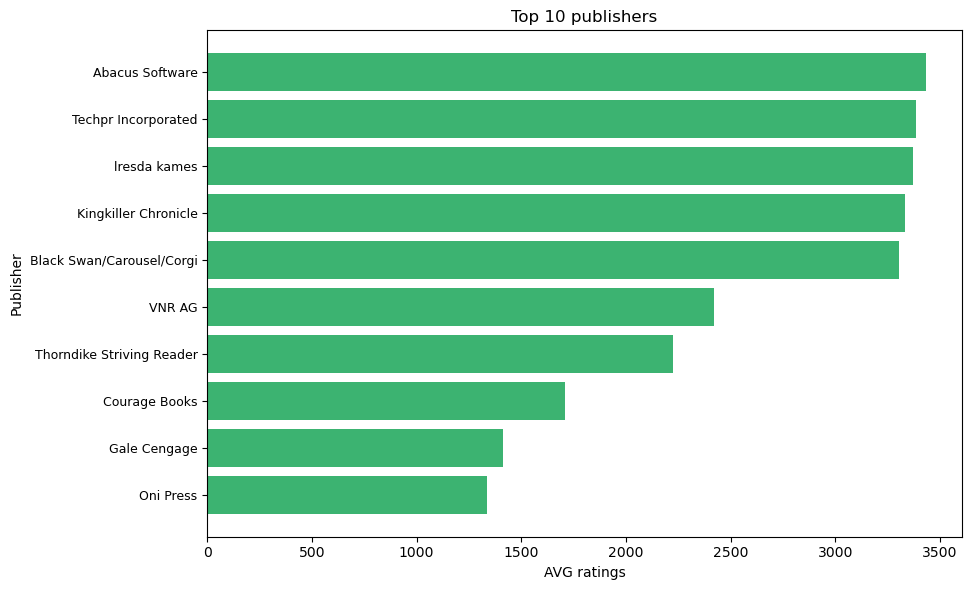

In [109]:
plt.figure(figsize= (10, 6))
plt.barh(df['publisher'], df['avg_ratings'], color = 'mediumseagreen')
#adding tags
plt.xlabel ("AVG ratings")
plt.ylabel("Publisher")
plt.title("Top 10 publishers")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.yticks (fontsize=9)
plt.show()

In [ ]:
SELECT 
	year,
	categories,
	COUNT(*) AS books_count
	FROM (
		SELECT *, EXTRACT (YEAR FROM "publishedDate") AS year
		FROM books_data
		WHERE "ratingsCount" IS NOT NULL AND "categories" IS NOT NULL
	) AS sub 
	GROUP BY year, categories
	ORDER BY year, books_count DESC;